# Summary

The dataframe that I studied here has 73 features, 3 of them being the primary key of the dataframe (`external_id`, `monnth` and  `year`), one of them is `state`, and one of them being the target (`unacast_session_count`). 


## Missing data
- 62 features have missing data.
- all the features have less than 10% of missing data, except for the `Number_of_holidays` feature. 
- only 6 features have more than 1% of missing data : `Number_of_holidays`, `Green_2016`, `perfect_days`, `Poor_mental_health_days`, `unacast_session_count` and `Adult_smoking`


**Zoom on particular features**
- `Number_of_holidays` : the missing values don't correspond to a given month/year (for example there are both values and missing values for January 2019), nor to a given state (all the states have missing values). I would try to find additional resource to fill up the Nas.
- `Green_2016` : The missing values correspond to only 7 states. I made some researches and I found out that the percentage of Green votes in those states are not smaller than the other results we already have in the dataframe. I would just look for the real values (for example, for Alaska it would be 1.8%).
- `unacast_session_count` : I grouped the missing values per playground, and I found out that some playgrounds (most of the playgrounds with missing data) only miss a few values (less than 3 values, knowing that we have 20 values per playground). However, some other playgrounds are missing more than 15 values. I personally don't feel comfortable using those rows because the point of our project is to infer those values, so I think we can't use them. I tried to look if the playgrounds with a lot of missing values were located in the same state, but it doesn't seem to be the case.
- `perfect_days` : the missing values for this feature don't seem to be linked to missing values for other features. Maybe we can try to infer the values using the other features that we have about the weather (look at the correlation). 
- `Adult_smoking` : some playgrounds don't have this information, we could maybe try to substitute those missing values by the average of the values that we have for the same state.
- `climate` :  It seems that the values are missing for some playgrounds. A solution to fill the Nas would be to take the value that is the most common in this state. Another possibility would be to use KNN with K=1, using the latitude and the longitude.
- For all the data about the weather, as there are only a few missing values, I would maybe take the average of the values we have for the same month for the same state as an approximation.

## Correlation

- I would keep `Democrats_08_Votes`, `Libertarians_2016`, and `hpi` as they have a correlation greater to 0.1 with the target. 
- I would get rid of at least `Democrats_12_Votes` and `Republican_12_Votes` as they both have a correlation of 0.99 with another feature. (and maybe also `Republican_08_Votes`)
- I would delete `temp_max_35_below`, `temp_min_35_below`, `temp_max_65_75`, `temp_min_45_55` ,`temp_max_85_95`, `temp_min_65_75`, `temp_max_75_85`, `temp_min_55_65`, `temp_max_55_65`, `temp_min_35_45`, `temp_max_95_above`, `temp_min_85_95`, `local_amount_per_capita`, `temp_max_45_55` 

## PCA

I realized a PCA on some subset of the data that I think can be gathered in the same group, as they all relate to the same topic. 
I found out that most of those groups can be reduced to 2 or 3 dimensions that would explain more than 90% of the variance. I think we can **reduce the 55 features that I studied into 21 dimensions**. Further details in the analysis.

# Load the data

In [1]:
#Download libraries
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [2]:
#Download the data
df = pd.read_csv('../data/train_data.zip')
df.head()

,external_id,month,year,monthly_number_of_sessions,monthly_unique_sessions,monthly_repeated_sessions,monthly_avg_length_of_session,monthly_avg_light_activity,monthly_avg_moderate_activity,monthly_avg_vigorous_activity,...,avg_wind_9_10,avg_wind_10_11,avg_wind_11_12,avg_wind_12_above,perfect_days,unacast_session_count,hpi,state_and_local_amount_per_capita,state_amount_per_capita,local_amount_per_capita
0,1807558,9,2018,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,37.0,418.67,0.116368,0.025516,0.090852
1,1806729,9,2018,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,63.0,710.00,0.175774,0.020170,0.155604
2,MR00096403,9,2018,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,15.0,241.24,0.112038,0.006893,0.105145
3,1806350,9,2018,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,45.0,468.51,0.120088,0.003619,0.116469
4,FM00169477,9,2018,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,83.0,326.05,0.132935,0.025298,0.107637


In [3]:
#drop the columns that we are not going to study here
df_weather = df.drop(df.columns[[i for i in range(3, 793)]], axis=1)
df_weather['state'] = df['state']
df_weather['climate'] = df['climate']

In [4]:
df_weather.head()

,external_id,month,year,Democrats_08_Votes,Democrats_12_Votes,Republican_08_Votes,Republican_12_Votes,Republicans_2016,Democrats_2016,Green_2016,...,avg_wind_11_12,avg_wind_12_above,perfect_days,unacast_session_count,hpi,state_and_local_amount_per_capita,state_amount_per_capita,local_amount_per_capita,state,climate
0,1807558,9,2018,105656.0,103989.0,57941.0,53105.0,31.141086,63.991145,0.813459,...,0.0,0.0,0.0,37.0,418.67,0.116368,0.025516,0.090852,South Carolina,C
1,1806729,9,2018,648230.0,668004.0,259716.0,275700.0,21.714537,72.148925,1.653559,...,0.0,0.0,0.0,63.0,710.00,0.175774,0.020170,0.155604,Washington,C
2,MR00096403,9,2018,7421.0,7507.0,9256.0,9828.0,62.321978,31.155292,0.415860,...,0.0,0.0,1.0,15.0,241.24,0.112038,0.006893,0.105145,Iowa,D
3,1806350,9,2018,205984.0,216071.0,73065.0,83644.0,23.387994,71.376863,1.415684,...,0.0,0.0,2.0,45.0,468.51,0.120088,0.003619,0.116469,Wisconsin,D
4,FM00169477,9,2018,62755.0,60246.0,46829.0,47204.0,41.173252,55.651665,NaN,...,0.0,0.0,0.0,83.0,326.05,0.132935,0.025298,0.107637,Georgia,C


In [5]:
df_weather.shape

(50120, 73)

In [6]:
categorical_features = df_weather.loc[:, df_weather.dtypes == "object"]
categorical_features

,external_id,state,climate
0,1807558,South Carolina,C
1,1806729,Washington,C
2,MR00096403,Iowa,D
3,1806350,Wisconsin,D
4,FM00169477,Georgia,C
...,...,...,...
50115,MR00111485,Texas,C
50116,Kyle Rec Kenner 4,Louisiana,C
50117,1901693,Washington,C
50118,FM00166877,Michigan,D


In [7]:
describe = df_weather.describe()
describe

,month,year,Democrats_08_Votes,Democrats_12_Votes,Republican_08_Votes,Republican_12_Votes,Republicans_2016,Democrats_2016,Green_2016,Libertarians_2016,...,avg_wind_9_10,avg_wind_10_11,avg_wind_11_12,avg_wind_12_above,perfect_days,unacast_session_count,hpi,state_and_local_amount_per_capita,state_amount_per_capita,local_amount_per_capita
count,50120.000000,50120.000000,5.008000e+04,5.008000e+04,50080.000000,50080.000000,50080.000000,50080.000000,45540.000000,50080.000000,...,50119.000000,50119.000000,50119.000000,50119.000000,46179.000000,49503.000000,50120.000000,50120.000000,50120.000000,50120.000000
mean,6.100000,2018.450000,2.511879e+05,2.420785e+05,161876.019169,161770.427716,45.133999,49.546060,1.153054,3.385829,...,0.008460,0.003152,0.001397,0.001137,1.862708,136.487001,363.333280,0.142607,0.017662,0.124945
std,3.080615,0.497499,4.240253e+05,4.069783e+05,208818.129220,202063.482621,15.439487,15.705882,0.497583,1.082858,...,0.109271,0.064654,0.039928,0.034869,3.020981,536.476769,268.135485,0.053920,0.012470,0.052613
min,1.000000,2018.000000,4.500000e+02,3.460000e+02,415.000000,446.000000,4.122067,8.100626,0.130492,0.576831,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,62.050000,0.070614,0.000000,0.037019
25%,3.750000,2018.000000,3.139450e+04,2.984800e+04,32215.500000,34304.750000,34.637393,38.506535,0.811221,2.592388,...,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,205.510000,0.094705,0.008126,0.086578
50%,6.000000,2018.000000,1.090470e+05,1.014150e+05,88323.000000,88461.000000,43.348072,50.960154,1.072316,3.421792,...,0.000000,0.000000,0.000000,0.000000,0.000000,58.000000,272.325000,0.132207,0.012953,0.113688
75%,8.250000,2019.000000,2.748800e+05,2.726128e+05,186832.000000,196888.000000,56.204687,61.126439,1.473836,4.008533,...,0.000000,0.000000,0.000000,0.000000,3.000000,124.000000,417.420000,0.164303,0.024017,0.151351
max,12.000000,2019.000000,2.295853e+06,2.216903e+06,956425.000000,885333.000000,87.844458,92.846592,4.599361,10.806091,...,4.000000,4.000000,3.000000,2.000000,27.000000,44860.000000,2299.780000,0.485204,0.063809,0.443315


# Missing values

In [8]:
#Names of columns containing NaNs
df_weather.columns[df_weather.isnull().any()]

Index(['Democrats_08_Votes', 'Democrats_12_Votes', 'Republican_08_Votes',
       'Republican_12_Votes', 'Republicans_2016', 'Democrats_2016',
       'Green_2016', 'Libertarians_2016', 'Poor_physical_health_days',
       'Poor_mental_health_days', 'Adult_smoking', 'Number_of_holidays',
       'weather_clear', 'weather_rain', 'weather_fog', 'weather_snow',
       'weather_thunder', 'weather_cloudy', 'weather_other',
       'temp_avg_35_below', 'temp_avg_35_45', 'temp_avg_45_55',
       'temp_avg_55_65', 'temp_avg_65_75', 'temp_avg_75_85', 'temp_avg_85_95',
       'temp_avg_95_above', 'temp_max_35_below', 'temp_max_35_45',
       'temp_max_45_55', 'temp_max_55_65', 'temp_max_65_75', 'temp_max_75_85',
       'temp_max_85_95', 'temp_max_95_above', 'temp_min_35_below',
       'temp_min_35_45', 'temp_min_45_55', 'temp_min_55_65', 'temp_min_65_75',
       'temp_min_75_85', 'temp_min_85_95', 'temp_min_95_above',
       'precip_mm_none', 'precip_mm_0_1', 'precip_mm_1_10',
       'precip_mm_10_ab

In [9]:
#Number of columns with missing data
len(df_weather.columns[df_weather.isnull().any()])

62

In [10]:
#Create a dataframe with the percentage of NaNs per column
count_na = pd.DataFrame(df_weather.isnull().sum()/df_weather.shape[0], columns=['na_prop'])

In [11]:
nas_prop = count_na[count_na['na_prop'] > 0].sort_values('na_prop',ascending = False)
nas_prop

,na_prop
Number_of_holidays,0.400000
Green_2016,0.091381
perfect_days,0.078631
Poor_mental_health_days,0.014366
unacast_session_count,0.012310
...,...
temp_max_45_55,0.000020
temp_max_55_65,0.000020
temp_max_75_85,0.000020
temp_max_85_95,0.000020


**Observation** : NaNs represent less than 10% of the data under study for all the features, except for the `Number_of_holidays` category where it represents 40%.

In [21]:
#Features with more than 1% of missing data
nas_prop[nas_prop['na_prop'] > 0.01]

,na_prop
Number_of_holidays,0.402634
Green_2016,0.091381
perfect_days,0.078631
climate,0.078611
Poor_mental_health_days,0.014366
unacast_session_count,0.012310
Adult_smoking,0.011572


## Focus on  `Number_of_holidays`

In [21]:
#Dataframe with `Number_of_holidays` == NaNs
null_holiday = df_weather[df_weather.isnull()['Number_of_holidays']]

In [22]:
#df_jan_19 contains all the rows corresponding to january 2019
df_jan_19 = df_weather[(df_weather['month'] == 1) & (df_weather['year'] == 2019)]

In [23]:
df_jan_19['Number_of_holidays'].isnull().sum()

11

In [24]:
df_jan_19.shape

(2506, 73)

In [25]:
df_jan_19['Number_of_holidays'].unique()

array([ 2., nan])

**Observation** : for a given month during a given year, there are either identical values or NaNs, maybe we could fill up the blanks using the other values of the table. Here for example, in January 2019, all the values are 2, except for 11 values that are NaNs. Maybe we can use the state and the date to find out the real values?

In [26]:
#Number of states with missing values
len(null_holiday['state'].value_counts())

51

**Observations** : All the states have missing values

## Focus on `Green_2016`

In [27]:
#Dataframe with `Green_2016` == NaNs
null_green = df_weather[df_weather.isnull()['Green_2016']]

In [28]:
null_green.drop(null_green.columns[[i for i in range(11, 71)]], axis=1)

,external_id,month,year,Democrats_08_Votes,Democrats_12_Votes,Republican_08_Votes,Republican_12_Votes,Republicans_2016,Democrats_2016,Green_2016,Libertarians_2016,state,climate
37,FM00166988,3,2018,254594.0,238224.0,65581.0,64392.0,16.064771,80.822723,NaN,3.112505,Georgia,C
51,FM00170681,3,2018,39178.0,37252.0,33857.0,34406.0,50.618365,43.835957,NaN,5.545678,Indiana,D
52,FM00170681,12,2018,39178.0,37252.0,33857.0,34406.0,50.618365,43.835957,NaN,5.545678,Indiana,D
60,aaf680dd-b6cc-4380-aec0-96e66e8ad30a,2,2019,253958.0,272262.0,153848.0,171668.0,33.410923,63.282045,NaN,3.307032,North Carolina,C
61,aaf680dd-b6cc-4380-aec0-96e66e8ad30a,5,2018,253958.0,272262.0,153848.0,171668.0,33.410923,63.282045,NaN,3.307032,North Carolina,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50025,b0d68b7d-77b2-4e68-8ff6-7d40a1583ecb,11,2018,2614.0,1958.0,8408.0,8926.0,82.317313,15.377960,NaN,2.304727,Georgia,C
50026,b0d68b7d-77b2-4e68-8ff6-7d40a1583ecb,7,2019,2614.0,1958.0,8408.0,8926.0,82.317313,15.377960,NaN,2.304727,Georgia,C
50027,b0d68b7d-77b2-4e68-8ff6-7d40a1583ecb,4,2019,2614.0,1958.0,8408.0,8926.0,82.317313,15.377960,NaN,2.304727,Georgia,C
50103,FM00166612,3,2019,31384.0,33171.0,52507.0,56138.0,64.789400,32.656632,NaN,2.553967,North Carolina,C


**Observation** : I would substitute null values by 0 to start, as we can see that for most of the rows, the value would be less than 1%. 

In [29]:
count_missing_green_state = df_weather[['state', 'Green_2016']][df_weather.isnull()['Green_2016']]['state'].value_counts()

**Observations**: all the missing values correspond to only 7 states. 

In [30]:
for state in ['Georgia', 'North Carolina', 'Indiana', 'Nevada', 'South Dakota', 'Oklahoma', 'Alaska']:
    print(df_weather[df_weather['state'] == state][['state', 'Green_2016']].shape[0] == count_missing_green_state[state])

True
True
True
True
True
True
True


**Observations** : all the `Green_2016` values corresponding to the states of Georgia, North Carolina, Indiana, Nevada, South Dakota, Oklahoma and Alaska are null. After further researches, I think we can just look for the values of those 7 state and input them by hand (it shouldn't take too long as it's only 7 values. For example the value for Alaska should be 1.80%.

## Focus on `unacast_sesion_count`

In [65]:
#Dataframe with `unacast_session_count` == NaNs
null_uni_count = df_weather[df_weather.isnull()['unacast_session_count']]

In [66]:
null_uni_count.shape

(617, 73)

In [110]:
# Double-checking the NaN count in the target column (Reiko)
df_weather.loc[:, 'unacast_session_count'].isna().sum()

617

**Observations** : We have 617 missing values in the `unacast_session_count` column

In [112]:
#Months for which there are NaNs values for unicast_session_count
sorted(null_uni_count['month'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [34]:
#Number of NaNs values corresponding to January 2018
#Commented because we got rid of the Janurary 2018 data
#null_uni_count[(null_uni_count['month'] == 1) & (null_uni_count['year'] == 2018)].shape

**Observations** : Most of the missing values correspond to January 2018.

In [35]:
#Let's consider the values that don't correspond to January 2018
count_null_uni_count = null_uni_count[(null_uni_count['month'] != 1) | (null_uni_count['year'] != 2018)]['external_id'].value_counts()

In [139]:
#Number of missing values per playground
df_missing_uni_count = pd.DataFrame(count_null_uni_count)
df_missing_uni_count.to_csv('../data/missing_unacast_count.csv')
df_missing_uni_count

,external_id
MR00101262,19
MR00110941,18
MR00105990,18
MR00117367,16
e5bdd7bc-325a-4f88-ad22-a3a820118b68,15
...,...
e652e9a0-3203-4dfe-ada4-c151b6b35330,1
FM00171112,1
FM00162693,1
FM00167468,1


In [151]:
# Reset and rename columns for consistency
df_missing_uni_count = df_missing_uni_count.reset_index().rename(columns={'index': 'external_id', 'external_id': 'count'})

In [152]:
df_missing_uni_count

,external_id,count
0,MR00101262,19
1,MR00110941,18
2,MR00105990,18
3,MR00117367,16
4,e5bdd7bc-325a-4f88-ad22-a3a820118b68,15
...,...,...
217,e652e9a0-3203-4dfe-ada4-c151b6b35330,1
218,FM00171112,1
219,FM00162693,1
220,FM00167468,1


In [141]:
state_missing_target_count = df_weather[df_weather['unacast_session_count'].isnull()]['state'].value_counts()
state_missing_target_count

Missouri          61
Minnesota         55
Iowa              54
Michigan          47
Illinois          38
New York          38
South Dakota      32
Wisconsin         27
Texas             25
Pennsylvania      21
Nebraska          20
Tennessee         19
New Jersey        18
Ohio              16
Indiana           16
South Carolina    13
Massachusetts     10
Connecticut        9
California         9
Washington         8
Georgia            8
Maine              7
Colorado           7
Utah               7
Florida            7
Louisiana          5
Virginia           5
Oregon             5
Arizona            4
Alaska             4
Mississippi        4
North Carolina     3
Montana            2
Idaho              2
Delaware           2
Alabama            2
New Hampshire      2
Arkansas           2
Maryland           1
Vermont            1
Kansas             1
Name: state, dtype: int64

**Observations** : The missing data are located in all the states.

*Reiko's comments*

41 out of 51 states (including the District of Columbia) have playgrounds that are missing the target value. See below:

In [142]:
len(state_missing_target_count)

41

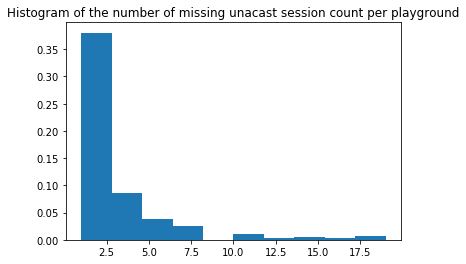

In [143]:
plt.hist(count_null_uni_count.values, density=True)
plt.title("Histogram of the number of missing unacast session count per playground")
plt.show()

**Observations** : We can see that most playground that have missing values for the `unacast_session_count` miss less than 3 values, but some playground only have 3 or 4 values that are not NaNs. We will have to understand why those data are missing, and find out how we want to deal with them. 

*Reiko's comments*

Let's dive into the playgrounds that are missing more than 50% of `unacast_session_count`:

In [176]:
df_missing_50 = df_missing_uni_count.query('count >= 10')
missing_50_id = df_missing_50['external_id']
missing_50_id

0                               MR00101262
1                               MR00110941
2                               MR00105990
3                               MR00117367
4     e5bdd7bc-325a-4f88-ad22-a3a820118b68
5                               MR00095127
6                               FM00171867
7                                  1805183
8                                  1809130
9                               MR00118229
10                              MR00110011
Name: external_id, dtype: object

There are 11 playgrounds that are missing more than 50% of `unacast_session_count`. 

Next, let's check the interval for which playgrounds are missing data.

In [224]:
df_missing_time = df_weather[df_weather['unacast_session_count'].isna()]

df_missing_time = df_missing_time.loc[:, ['month', 'year']]
df_missing_time['date'] = pd.to_datetime(df_missing_time[['year', 'month']].assign(DAY=1))

alt.Chart(df_missing_time).mark_bar().encode(
    alt.X('date:T'),
    alt.Y('count()')
)

alt.Chart(...)

This plot shows from which time interval the missing `unacast_session_count` are coming. More values appear to be missing in the winter months.

## Focus on `perfect_days`

In [39]:
# Create a dataframe containg only the rows corresponding to missing values for `perfect_days`, and telling if there is any missing data in the other rows
perfect_day_na = pd.DataFrame(df_weather[df_weather['perfect_days'].isnull()].isnull().sum(), columns = ['number_na'])
perfect_day_na[perfect_day_na['number_na'] > 0].sort_values('number_na', ascending=False)[1:]

,number_na
climate,3940
Number_of_holidays,1576
Green_2016,461
unacast_session_count,28
Poor_physical_health_days,20
...,...
temp_max_35_45,1
temp_max_45_55,1
temp_max_55_65,1
Democrats_12_Votes,1


In [40]:
#Number of missing values
df_weather[df_weather['perfect_days'].isnull()].shape[0]

3941

In [41]:
#Look if the missing data corresponds to a certain period of the year (winter?)
df_weather[df_weather['perfect_days'].isnull()]['month'].value_counts()

9     394
7     394
5     394
3     394
8     394
6     394
4     394
2     394
11    198
1     197
12    197
10    197
Name: month, dtype: int64

*Reiko's comments*

It looks as if 197 playgrounds are completely missing `perfect_days` data.

In [42]:
describe[['Poor_mental_health_days']]

,Poor_mental_health_days
count,49400.000000
mean,3.317854
std,0.626849
min,1.300000
25%,2.900000
50%,3.300000
75%,3.700000
max,7.100000


**Observations**: there doesn't seem to be a correlation between the missing data in `perfect_days` and other columns. Maybe we could infer the values from the temperature and the wind columns? 

In [43]:
weather = df_weather[['weather_clear', 'weather_rain', 'weather_fog', 'weather_snow',
       'weather_thunder', 'weather_cloudy', 'weather_other',
       'temp_avg_35_below', 'temp_avg_35_45', 'temp_avg_45_55',
       'temp_avg_55_65', 'temp_avg_65_75', 'temp_avg_75_85', 'temp_avg_85_95',
       'temp_avg_95_above', 'temp_max_35_below', 'temp_max_35_45',
       'temp_max_45_55', 'temp_max_55_65', 'temp_max_65_75', 'temp_max_75_85',
       'temp_max_85_95', 'temp_max_95_above', 'temp_min_35_below',
       'temp_min_35_45', 'temp_min_45_55', 'temp_min_55_65', 'temp_min_65_75',
       'temp_min_75_85', 'temp_min_85_95', 'temp_min_95_above',
       'precip_mm_none', 'precip_mm_0_1', 'precip_mm_1_10',
       'precip_mm_10_above', 'avg_wind_0_1', 'avg_wind_1_2', 'avg_wind_2_3',
       'avg_wind_3_4', 'avg_wind_4_5', 'avg_wind_5_6', 'avg_wind_6_7',
       'avg_wind_7_8', 'avg_wind_8_9', 'avg_wind_9_10', 'avg_wind_10_11',
       'avg_wind_11_12', 'avg_wind_12_above', 'perfect_days']]

In [44]:
weather.corr()['perfect_days'].sort_values(ascending=False)[1:]

temp_min_55_65        0.551765
temp_max_85_95        0.473740
temp_avg_65_75        0.458337
temp_avg_75_85        0.453773
temp_min_65_75        0.392635
weather_clear         0.331862
temp_max_75_85        0.330618
precip_mm_none        0.317784
temp_max_95_above     0.069490
avg_wind_0_1          0.025535
avg_wind_1_2          0.008001
avg_wind_2_3          0.004847
weather_thunder      -0.001201
temp_min_95_above    -0.004058
weather_other        -0.006660
avg_wind_11_12       -0.011826
avg_wind_12_above    -0.013508
avg_wind_10_11       -0.019285
avg_wind_3_4         -0.020335
avg_wind_9_10        -0.027615
avg_wind_8_9         -0.034248
avg_wind_5_6         -0.034297
avg_wind_4_5         -0.042465
temp_min_85_95       -0.045532
avg_wind_6_7         -0.046130
temp_avg_95_above    -0.051729
avg_wind_7_8         -0.053750
weather_rain         -0.055548
temp_avg_85_95       -0.077760
temp_min_75_85       -0.095714
precip_mm_0_1        -0.097243
weather_fog          -0.103131
precip_m

## Focus on `Adult_smoking`

In [45]:
describe[['Adult_smoking']]

,Adult_smoking
count,49540.000000
mean,0.167738
std,0.046246
min,0.046000
25%,0.136000
50%,0.162000
75%,0.193000
max,0.492000


In [46]:
smoking_state = df_weather[df_weather['Adult_smoking'].isnull()]['state'].value_counts()

In [231]:
#Number of missing values per state
smoking_state

Texas         240
Virginia      140
Illinois       80
California     40
Minnesota      20
Missouri       20
Utah           20
Kentucky       20
Name: state, dtype: int64

In [235]:
# Sum of missing values
sum(smoking_state)

580

In [236]:
#df_weather[df_weather['state'].isin(['Texas'])].shape[0]

In [237]:
smoking_date = df_weather[df_weather['Adult_smoking'].isnull()][['external_id', 'year','month']]
smoking_date.sort_values(['external_id', 'year', 'month']).head(20)

,external_id,year,month
32832,1804887,2018,2
7923,1804887,2018,3
42793,1804887,2018,4
7924,1804887,2018,5
42791,1804887,2018,6
2859,1804887,2018,7
12982,1804887,2018,8
2857,1804887,2018,9
37847,1804887,2018,10
22907,1804887,2018,11


**Observations** : There are missing values for a few playgrounds, maybe we could just take the mean of the values that we have for the state in which the playgrounds are.  

*Reiko's comments*

It appears that there are 580/20 = 29 playgrounds with missing `Adult_smoking` entries. See below:

In [245]:
#`Adult_smoking` is a time invariant variable so we can check with the Jan. 2019 subset
df_jan_19.loc[:, ['external_id', 'Adult_smoking']].isna().sum()

external_id       0
Adult_smoking    29
dtype: int64

## Focus on `climate`

In [247]:
df_weather['climate'].unique()

array(['C', 'A', nan, 'D'], dtype=object)

*Reiko's comments*

Let's find the playgrounds that have `NaN` values in the `climate` column:

In [273]:
# `climate` is time invariant so let's just use the Jan. 2019 subset
# Create a dataframe of playgrounds missing `climate` data
df_missing_climate = df_jan_19[df_jan_19['climate'].isnull()]
df_missing_climate

,external_id,month,year,Democrats_08_Votes,Democrats_12_Votes,Republican_08_Votes,Republican_12_Votes,Republicans_2016,Democrats_2016,Green_2016,...,avg_wind_11_12,avg_wind_12_above,perfect_days,unacast_session_count,hpi,state_and_local_amount_per_capita,state_amount_per_capita,local_amount_per_capita,state,climate
371,FM00168894,1,2019,4749.0,4660.0,9431.0,9185.0,67.833698,30.415755,NaN,...,0.0,0.0,NaN,64.0,201.86,0.132935,0.025298,0.107637,Georgia,NaN
1149,MR00105268,1,2019,325017.0,329063.0,310041.0,318127.0,45.276268,49.610744,1.470864,...,0.0,0.0,NaN,247.0,284.47,0.164303,0.012953,0.151351,California,NaN
1294,MR00096953,1,2019,254017.0,232788.0,136981.0,140152.0,27.404754,66.263289,1.604286,...,0.0,0.0,NaN,67.0,205.10,0.094705,0.008126,0.086578,Texas,NaN
1408,1901343,1,2019,82236.0,77137.0,93328.0,97554.0,47.931611,38.691733,1.602356,...,0.0,0.0,NaN,482.0,290.92,0.113998,0.019515,0.094483,Idaho,NaN
1611,MR00120184,1,2019,12420.0,12212.0,12775.0,12986.0,54.980813,36.988018,1.025922,...,0.0,0.0,NaN,28.0,249.24,0.234027,0.040532,0.193495,Minnesota,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49795,MR00113934,1,2019,131219.0,126377.0,89626.0,87401.0,40.791741,55.573163,1.096478,...,0.0,0.0,NaN,7.0,275.54,0.082881,0.022425,0.060456,New Jersey,NaN
49862,FM00173743,1,2019,116182.0,106982.0,163172.0,149728.0,51.690186,41.175912,NaN,...,0.0,0.0,NaN,134.0,471.94,0.130826,0.013706,0.117120,Oklahoma,NaN
49872,MR00117069,1,2019,82698.0,81487.0,69822.0,77629.0,42.782485,50.638612,0.951379,...,0.0,0.0,NaN,353.0,917.76,0.116368,0.025516,0.090852,South Carolina,NaN
49889,MR00098437,1,2019,98368.0,101144.0,103206.0,116126.0,45.017994,51.648250,0.684419,...,0.0,0.0,NaN,65.0,246.70,0.094705,0.008126,0.086578,Texas,NaN


Find states with playgrounds that have `NaN` values in the `climate` column:

In [276]:
df_missing_climate['state'].unique()

array(['Georgia', 'California', 'Texas', 'Idaho', 'Minnesota',
       'Connecticut', 'Michigan', 'Florida', 'Missouri', 'Nebraska',
       'Pennsylvania', 'North Carolina', 'Illinois', 'South Carolina',
       'Arkansas', 'Ohio', 'Nevada', 'Massachusetts', 'Oregon', 'Iowa',
       'Vermont', 'Washington', 'New York', 'New Jersey', 'Tennessee',
       'Colorado', 'Mississippi', 'Virginia', 'New Hampshire',
       'Louisiana', 'Arizona', 'South Dakota', 'Maryland', 'Wisconsin',
       'Kentucky', 'Indiana', 'Delaware', 'Rhode Island', 'Utah',
       'Hawaii', 'Oklahoma'], dtype=object)

In [50]:
df_weather[(df_weather['climate'].isnull() == False) & (df_weather['state'].isin(['Texas']))]['climate'].value_counts()

C    4760
A     620
Name: climate, dtype: int64

**Observations** : Even within the same state, the climate is not the same. 

In [51]:
df_weather[df_weather['climate'].isnull()].sort_values(['external_id']).head(20)

,external_id,month,year,Democrats_08_Votes,Democrats_12_Votes,Republican_08_Votes,Republican_12_Votes,Republicans_2016,Democrats_2016,Green_2016,...,avg_wind_11_12,avg_wind_12_above,perfect_days,unacast_session_count,hpi,state_and_local_amount_per_capita,state_amount_per_capita,local_amount_per_capita,state,climate
17586,1803648,2,2019,67269.0,62526.0,55854.0,64836.0,52.700848,41.850396,1.075319,...,0.0,0.0,NaN,22.0,261.89,0.120088,0.003619,0.116469,Wisconsin,NaN
22568,1803648,4,2019,67269.0,62526.0,55854.0,64836.0,52.700848,41.850396,1.075319,...,0.0,0.0,NaN,26.0,261.89,0.120088,0.003619,0.116469,Wisconsin,NaN
12705,1803648,10,2018,67269.0,62526.0,55854.0,64836.0,52.700848,41.850396,1.075319,...,0.0,0.0,NaN,79.0,261.89,0.120088,0.003619,0.116469,Wisconsin,NaN
27544,1803648,6,2019,67269.0,62526.0,55854.0,64836.0,52.700848,41.850396,1.075319,...,0.0,0.0,NaN,15.0,261.89,0.120088,0.003619,0.116469,Wisconsin,NaN
27545,1803648,1,2019,67269.0,62526.0,55854.0,64836.0,52.700848,41.850396,1.075319,...,0.0,0.0,NaN,45.0,261.89,0.120088,0.003619,0.116469,Wisconsin,NaN
27546,1803648,4,2018,67269.0,62526.0,55854.0,64836.0,52.700848,41.850396,1.075319,...,0.0,0.0,NaN,11.0,261.89,0.120088,0.003619,0.116469,Wisconsin,NaN
22567,1803648,5,2019,67269.0,62526.0,55854.0,64836.0,52.700848,41.850396,1.075319,...,0.0,0.0,NaN,38.0,261.89,0.120088,0.003619,0.116469,Wisconsin,NaN
22566,1803648,11,2018,67269.0,62526.0,55854.0,64836.0,52.700848,41.850396,1.075319,...,0.0,0.0,NaN,63.0,261.89,0.120088,0.003619,0.116469,Wisconsin,NaN
47547,1803648,7,2019,67269.0,62526.0,55854.0,64836.0,52.700848,41.850396,1.075319,...,0.0,0.0,NaN,9.0,261.89,0.120088,0.003619,0.116469,Wisconsin,NaN
17588,1803648,12,2018,67269.0,62526.0,55854.0,64836.0,52.700848,41.850396,1.075319,...,0.0,0.0,NaN,46.0,261.89,0.120088,0.003619,0.116469,Wisconsin,NaN


**Observation** : It seems that the value is missing for some playgrounds. A solution to fill the Nas would be to take the value that is the most common in this state. Another possibility would be to use KNN with K=1, using the latitude and the longitude.

# Correlation

## Correlation with the target

In [7]:
#Correlation greater than 0.1 with the target
corr_unacast = df_weather.corr()[['unacast_session_count']]
corr_unacast[(abs(corr_unacast['unacast_session_count']) > 0.08) & (corr_unacast['unacast_session_count'] != 1)]

,unacast_session_count
Democrats_08_Votes,0.106437
Democrats_12_Votes,0.106476
Republicans_2016,-0.140351
Democrats_2016,0.146706
Libertarians_2016,-0.110955
Adult_obesity,-0.093564
hpi,0.148532


## Correlation within the data

In [4]:
corr = df_weather.corr()

In [5]:
#Number of features that have a correlation greater than 0.8
count_corr = pd.DataFrame((corr > 0.8).sum() - 1, columns=['number_corr'])
high_corr = count_corr[count_corr['number_corr'] > 0].sort_values('number_corr', ascending=False)
high_corr

,number_corr
Democrats_08_Votes,3
Republican_08_Votes,3
Republican_12_Votes,3
Democrats_12_Votes,3
temp_avg_35_below,3
temp_avg_55_65,2
temp_max_35_below,2
temp_avg_75_85,2
temp_avg_65_75,2
temp_avg_45_55,2


**Observations** : some values seem to be highly correlated, let's dig a little bit more into it.

In [55]:
for party in ['Democrats_08_Votes', 'Republican_08_Votes', 'Republican_12_Votes', 'Democrats_12_Votes']:
    print(corr[(corr[party] > 0.8) & (corr[party] != 1)][party])

Democrats_12_Votes     0.999290
Republican_08_Votes    0.862909
Republican_12_Votes    0.843744
Name: Democrats_08_Votes, dtype: float64
Democrats_08_Votes     0.862909
Democrats_12_Votes     0.868322
Republican_12_Votes    0.997877
Name: Republican_08_Votes, dtype: float64
Democrats_08_Votes     0.843744
Democrats_12_Votes     0.849168
Republican_08_Votes    0.997877
Name: Republican_12_Votes, dtype: float64
Democrats_08_Votes     0.999290
Republican_08_Votes    0.868322
Republican_12_Votes    0.849168
Name: Democrats_12_Votes, dtype: float64


**Observations** : I would get rid of at least `Democrats_12_Votes` and `Republican_12_Votes` as they both have a correlation of 0.99 with another feature.

In [56]:
#Dictionnary to hold the variables that are highly correlated to a variable and there correlation for all the variables
temp_corr = {}
for var in high_corr.index[4:]:
    #Intermediate dictionnary to hold the variables that are highly correlated to a variable and there correlation for a given variable
    correlation = {}
    for correlated in corr[(corr[var] > 0.8) & (corr[var] != 1)][var].index:
        correlation[correlated] = corr.loc[var, correlated]
    temp_corr[var] = correlation

In [57]:
temp_corr

{'temp_avg_35_below': {'weather_snow': 0.8179547994993942,
  'temp_max_35_below': 0.8881949203928493,
  'temp_min_35_below': 0.8890492543686465},
 'temp_avg_55_65': {'temp_max_65_75': 0.8897717101414939,
  'temp_min_45_55': 0.8798974486007091},
 'temp_max_35_below': {'weather_snow': 0.8179985461406851,
  'temp_avg_35_below': 0.8881949203928493},
 'temp_avg_75_85': {'temp_max_85_95': 0.9103632133893618,
  'temp_min_65_75': 0.8725348388370858},
 'temp_avg_65_75': {'temp_max_75_85': 0.8643865848859562,
  'temp_min_55_65': 0.8654763578582441},
 'temp_avg_45_55': {'temp_max_55_65': 0.91406808618857,
  'temp_min_35_45': 0.9066621452960888},
 'weather_snow': {'temp_avg_35_below': 0.8179547994993942,
  'temp_max_35_below': 0.8179985461406851},
 'temp_min_35_below': {'temp_avg_35_below': 0.8890492543686465,
  'temp_max_35_45': 0.8531049459515649},
 'temp_max_95_above': {'temp_avg_85_95': 0.8771478849358603},
 'temp_min_85_95': {'temp_avg_95_above': 0.9127854462855847},
 'temp_min_65_75': {'temp

**Observations** : 
- I would keep `temp_avg_35_below`, `weather_snow`, `temp_avg_55_65`, `temp_avg_75_85`, `temp_avg_65_75`, `temp_avg_45_55`, `temp_avg_85_95`, `temp_avg_95_above`, `state_and_local_amount_per_capita`, `temp_max_35_45`, `temp_avg_35_45`.

- I would delete `temp_max_35_below`, `temp_min_35_below`, `temp_max_65_75`, `temp_min_45_55` ,`temp_max_85_95`, `temp_min_65_75`, `temp_max_75_85`, `temp_min_55_65`, `temp_max_55_65`, `temp_min_35_45`, `temp_max_95_above`, `temp_min_85_95`, `local_amount_per_capita`, `temp_max_45_55` 

# PCA

I would now try to use PCA on all the subcategories of data (political parties, rain level, temperature, wind, type of weather)to see if we can reduce the number of features among those clusters of features.

In [17]:
scaler_cat = StandardScaler()
X_scaled_np = scaler_cat.fit_transform(df_weather.drop(columns = ['unacast_session_count'] + 
                                                            list(df_weather.loc[:, df_weather.dtypes == "object"])))
X_scaled = pd.DataFrame(X_scaled_np, index=df_weather.index, columns=df_weather.drop(columns = ['unacast_session_count'] + 
                                                            list(df_weather.loc[:, df_weather.dtypes == "object"])).columns)

In [18]:
X_scaled.columns

Index(['month', 'year', 'Democrats_08_Votes', 'Democrats_12_Votes',
       'Republican_08_Votes', 'Republican_12_Votes', 'Republicans_2016',
       'Democrats_2016', 'Green_2016', 'Libertarians_2016',
       'Poor_physical_health_days', 'Poor_mental_health_days', 'Adult_smoking',
       'Adult_obesity', 'Diabetes', 'Number_of_holidays', 'weather_clear',
       'weather_rain', 'weather_fog', 'weather_snow', 'weather_thunder',
       'weather_cloudy', 'weather_other', 'temp_avg_35_below',
       'temp_avg_35_45', 'temp_avg_45_55', 'temp_avg_55_65', 'temp_avg_65_75',
       'temp_avg_75_85', 'temp_avg_85_95', 'temp_avg_95_above',
       'temp_max_35_below', 'temp_max_35_45', 'temp_max_45_55',
       'temp_max_55_65', 'temp_max_65_75', 'temp_max_75_85', 'temp_max_85_95',
       'temp_max_95_above', 'temp_min_35_below', 'temp_min_35_45',
       'temp_min_45_55', 'temp_min_55_65', 'temp_min_65_75', 'temp_min_75_85',
       'temp_min_85_95', 'temp_min_95_above', 'precip_mm_none',
       'prec

In [19]:
politics = X_scaled[['Democrats_08_Votes', 'Democrats_12_Votes', 'Republican_08_Votes', 'Republican_12_Votes', 'Republicans_2016', 'Democrats_2016', 'Green_2016', 'Libertarians_2016']]
health = X_scaled[['Poor_physical_health_days', 'Poor_mental_health_days', 'Adult_smoking', 'Adult_obesity', 'Diabetes']]
weather = X_scaled[['weather_clear', 'weather_rain', 'weather_fog', 'weather_snow', 'weather_thunder','weather_cloudy', 'weather_other']]
temp = X_scaled[['temp_avg_35_below','temp_avg_35_45', 'temp_avg_45_55', 'temp_avg_55_65', 'temp_avg_65_75','temp_avg_75_85', 'temp_avg_85_95', 'temp_avg_95_above',
       'temp_max_35_below', 'temp_max_35_45', 'temp_max_45_55','temp_max_55_65', 'temp_max_65_75', 'temp_max_75_85', 'temp_max_85_95',
       'temp_max_95_above', 'temp_min_35_below', 'temp_min_35_45','temp_min_45_55', 'temp_min_55_65', 'temp_min_65_75', 'temp_min_75_85',
       'temp_min_85_95', 'temp_min_95_above']]
precip = X_scaled[['precip_mm_none', 'precip_mm_0_1', 'precip_mm_1_10', 'precip_mm_10_above']]
wind = X_scaled[['avg_wind_0_1', 'avg_wind_1_2', 'avg_wind_2_3', 'avg_wind_3_4', 'avg_wind_4_5', 'avg_wind_5_6', 'avg_wind_6_7', 'avg_wind_7_8', 'avg_wind_8_9',
       'avg_wind_9_10', 'avg_wind_10_11', 'avg_wind_11_12', 'avg_wind_12_above']]

total_weather = X_scaled[['weather_clear', 'weather_rain', 'weather_fog', 'weather_snow', 'weather_thunder','weather_cloudy', 'weather_other', 'temp_avg_35_below','temp_avg_35_45', 'temp_avg_45_55', 'temp_avg_55_65', 'temp_avg_65_75','temp_avg_75_85', 'temp_avg_85_95', 'temp_avg_95_above',
       'temp_max_35_below', 'temp_max_35_45', 'temp_max_45_55','temp_max_55_65', 'temp_max_65_75', 'temp_max_75_85', 'temp_max_85_95',
       'temp_max_95_above', 'temp_min_35_below', 'temp_min_35_45','temp_min_45_55', 'temp_min_55_65', 'temp_min_65_75', 'temp_min_75_85',
       'temp_min_85_95', 'temp_min_95_above', 'precip_mm_none', 'precip_mm_0_1', 'precip_mm_1_10', 'precip_mm_10_above', 'avg_wind_0_1', 'avg_wind_1_2', 'avg_wind_2_3', 'avg_wind_3_4', 'avg_wind_4_5', 'avg_wind_5_6', 'avg_wind_6_7', 'avg_wind_7_8', 'avg_wind_8_9',
       'avg_wind_9_10', 'avg_wind_10_11', 'avg_wind_11_12', 'avg_wind_12_above']]

In [20]:
datas = {'politics' : politics, 'health' : health, 'weather' : weather, 'temp' : temp, 'precip' : precip, 'wind' : wind, 'total_weather' : total_weather}
for name in datas:
    print(name)
    data = datas[name]
    for i in range(1, data.shape[1]):
        pca = PCA(n_components=i)
        pca.fit(data.dropna())
        print('number of components = ' + str(i))
        print('my accounted var: ', 1 - pca.explained_variance_ratio_[i-1])

politics
number of components = 1
my accounted var:  0.42099157754455097
number of components = 2
my accounted var:  0.7971574410706446
number of components = 3
my accounted var:  0.8576298189140237
number of components = 4
my accounted var:  0.9530433810302363
number of components = 5
my accounted var:  0.9737168498646657
number of components = 6
my accounted var:  0.99768116020594
number of components = 7
my accounted var:  0.9998495280216214
health
number of components = 1
my accounted var:  0.3851752773690823
number of components = 2
my accounted var:  0.8062502219117634
number of components = 3
my accounted var:  0.916436770432145
number of components = 4
my accounted var:  0.9415219167744711
weather
number of components = 1
my accounted var:  0.6653823250386331
number of components = 2
my accounted var:  0.80617542039919
number of components = 3
my accounted var:  0.8479542875014834
number of components = 4
my accounted var:  0.875694291476004
number of components = 5
my accounte

**Observations** : 
- for the `politics` : 2 components are enough to explain 95% of the variance, and we can explain 99.9% of the variance with 3 components
- for the `health` : 2 components are enough to explain 86% of the variance, and we can explain 99.7% of the variance with 3 components
- for the `weather` : 2 components are enough to explain 88% of the variance, and we can explain 92% of the variance with 3 components
- for the `temp` : 4 components are enough to explain 92.7% of the variance, and we can explain 95% of the variance with 5 components
- for the `wind` : 3 components are enough to explain 94% of the variance, and we can explain 98% of the variance with 4 components
- I would keep all the components in the `precip` category

*Additional observations from Reiko*

- This dataset counts the District of Washington as a state; we have 50 in total
- `Number_of_holidays`: if this column is concerned with federal holidays, for a given month, the counts should be the same across playgrounds and years
- Features related to politics: features like `Republicans_2016` and `Democrats_2016` most likely serves as a proxy for the political and social backdrop. However, since `Green_2016` and `Libertarians_2016` values are so miniscule, I'm wondering if they'll add any value to the model.
- `unacast_session_count` is missing for 617 observations
    - There are 11 playgrounds that are missing >50% 
    - The time interval for which playgrounds are missing data: it appears that `unacast_session_count` is mostly missing for the winter months
    - `unacast_session_count` is either `NaN` or a positive integer
- `climate` is missing for 197 playgrounds
    - My hunch is that these playgrounds also have `NaN` in `perfect_days`